# Dropout Regularization (with and without)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

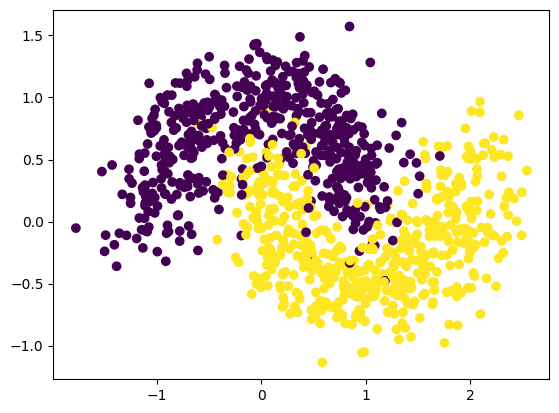

In [58]:
x,y=make_moons(1000,noise=0.25,random_state=2)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# With Dropout layer

In [59]:
model1=Sequential()

model1.add(Dense(128,input_dim=2,activation='relu')) #not input_shape it's input_dim
model1.add(Dropout(0.5))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               384       
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [60]:
adam=Adam(learning_rate=0.01)
model1.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history1=model1.fit(x,y,epochs=50,validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 1s 20ms/step - loss: 0.3765 - accuracy: 0.8500 - val_loss: 0.3314 - val_accuracy: 0.8100
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.2895 - accuracy: 0.8763 - val_loss: 0.3076 - val_accuracy: 0.8350
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2707 - accuracy: 0.8913 - val_loss: 0.2766 - val_accuracy: 0.8600
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2503 - accuracy: 0.8938 - val_loss: 0.2481 - val_accuracy: 0.8700
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2294 - accuracy: 0.9087 - val_loss: 0.2266 - val_accuracy: 0.9000
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.2007 - accuracy: 0.9187 - val_loss: 0.2268 - val_accuracy: 0.9000
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 0.1895 - accuracy: 0.9337 - val_loss: 0.2671 - val_accuracy: 0.8800
Epoch 8/50
25/25 [

9600/9600 [==============================] - 23s 2ms/step


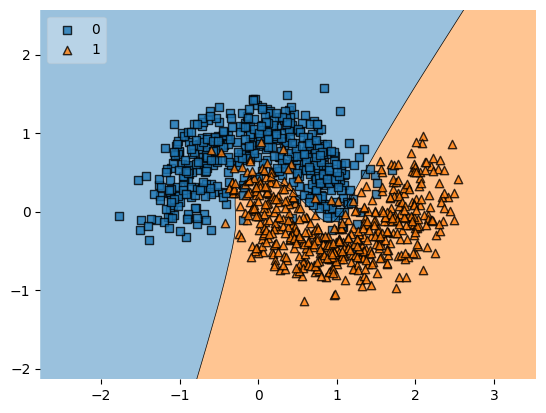

In [61]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.show()

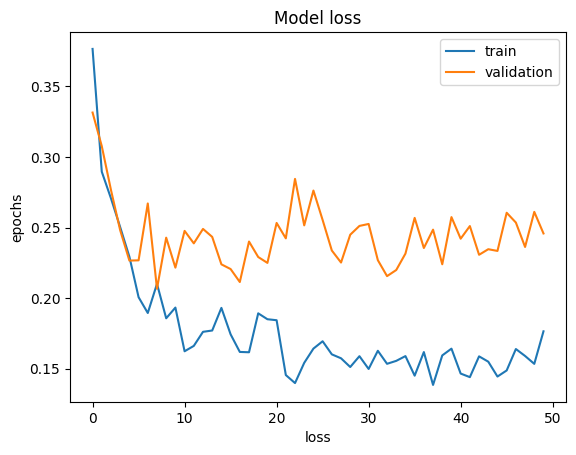

In [62]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model loss")
plt.xlabel("loss")
plt.ylabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [63]:
acc_model1=history1.history['accuracy'][-1]*100
print(f"Accuracy with dropout layer : {acc_model1}")

Accuracy with dropout layer : 93.12499761581421


# Without dropout layer

In [64]:
model2=Sequential()

model2.add(Dense(128,input_dim=2,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               384       
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [65]:
adam=Adam(learning_rate=0.01)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
history2=model2.fit(x,y,epochs=50,validation_split=0.2)

Epoch 1/50
25/25 [==============================] - 1s 12ms/step - loss: 0.3558 - accuracy: 0.8612 - val_loss: 0.4035 - val_accuracy: 0.8050
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2849 - accuracy: 0.8788 - val_loss: 0.2741 - val_accuracy: 0.8650
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1974 - accuracy: 0.9237 - val_loss: 0.2349 - val_accuracy: 0.9150
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1719 - accuracy: 0.9425 - val_loss: 0.2418 - val_accuracy: 0.8900
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1603 - accuracy: 0.9438 - val_loss: 0.2121 - val_accuracy: 0.9350
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1445 - accuracy: 0.9475 - val_loss: 0.2195 - val_accuracy: 0.9200
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1355 - accuracy: 0.9500 - val_loss: 0.2501 - val_accuracy: 0.9100
Epoch 8/50
25/25 [=

9600/9600 [==============================] - 22s 2ms/step


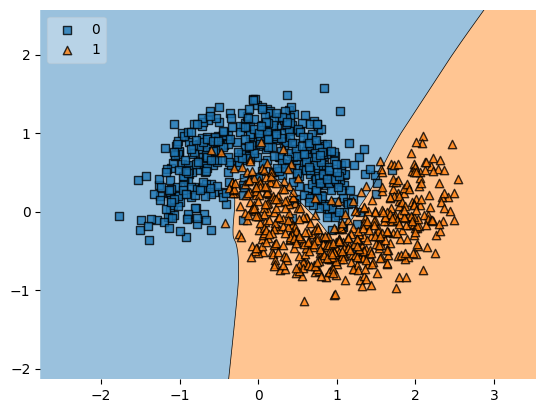

In [66]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.show()

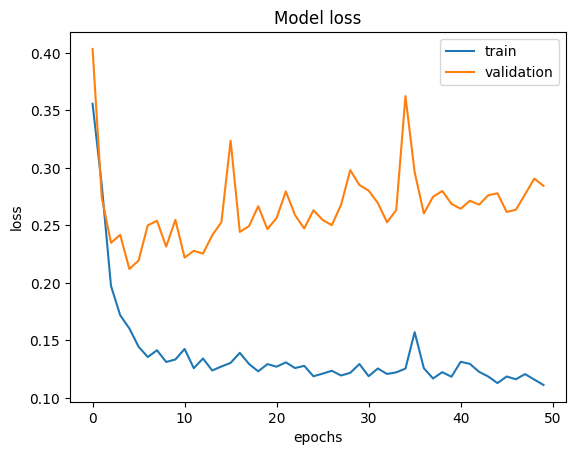

In [67]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train','validation'])
plt.show()

In [68]:
acc_model2=history2.history['accuracy'][-1]*100
print(f"Accuracy without dropout layer : {acc_model2}")

Accuracy without dropout layer : 96.12500071525574
